In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis exploratorio de los datos

In [2]:
housdt = pd.read_csv('train_housing_data_italy.csv')

In [3]:
housdf = pd.DataFrame(housdt)
housdf.head()

,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,availability,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,siculiana,"villa unifamiliare via campo spoto 38, siculiana",46000.0,4.0,NaN,85.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,37.338086,13.421996
1,1.661114e+09,strongoli,"quadrilocale contrada tronga 211, tronca, stro...",120000.0,4.0,2.0,190.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,39.263959,17.052026
2,1.661114e+09,zelbio,"bilocale buono stato, piano terra, zelbio",55000.0,2.0,NaN,85.0,1.0,NaN,not free / other,...,0,1,0,1,0,0,0,0,45.904582,9.180539
3,1.661114e+09,villamagna,"casa colonica, da ristrutturare, 319 m², villa...",130000.0,4.0,NaN,319.0,1.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,42.333295,14.236808
4,1.661114e+09,vallefiorita,"appartamento corso italia, vallefiorita",30000.0,NaN,NaN,143.0,2.0,NaN,not free / other,...,0,0,0,1,0,0,0,0,38.776385,16.461003


In [4]:
print(housdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

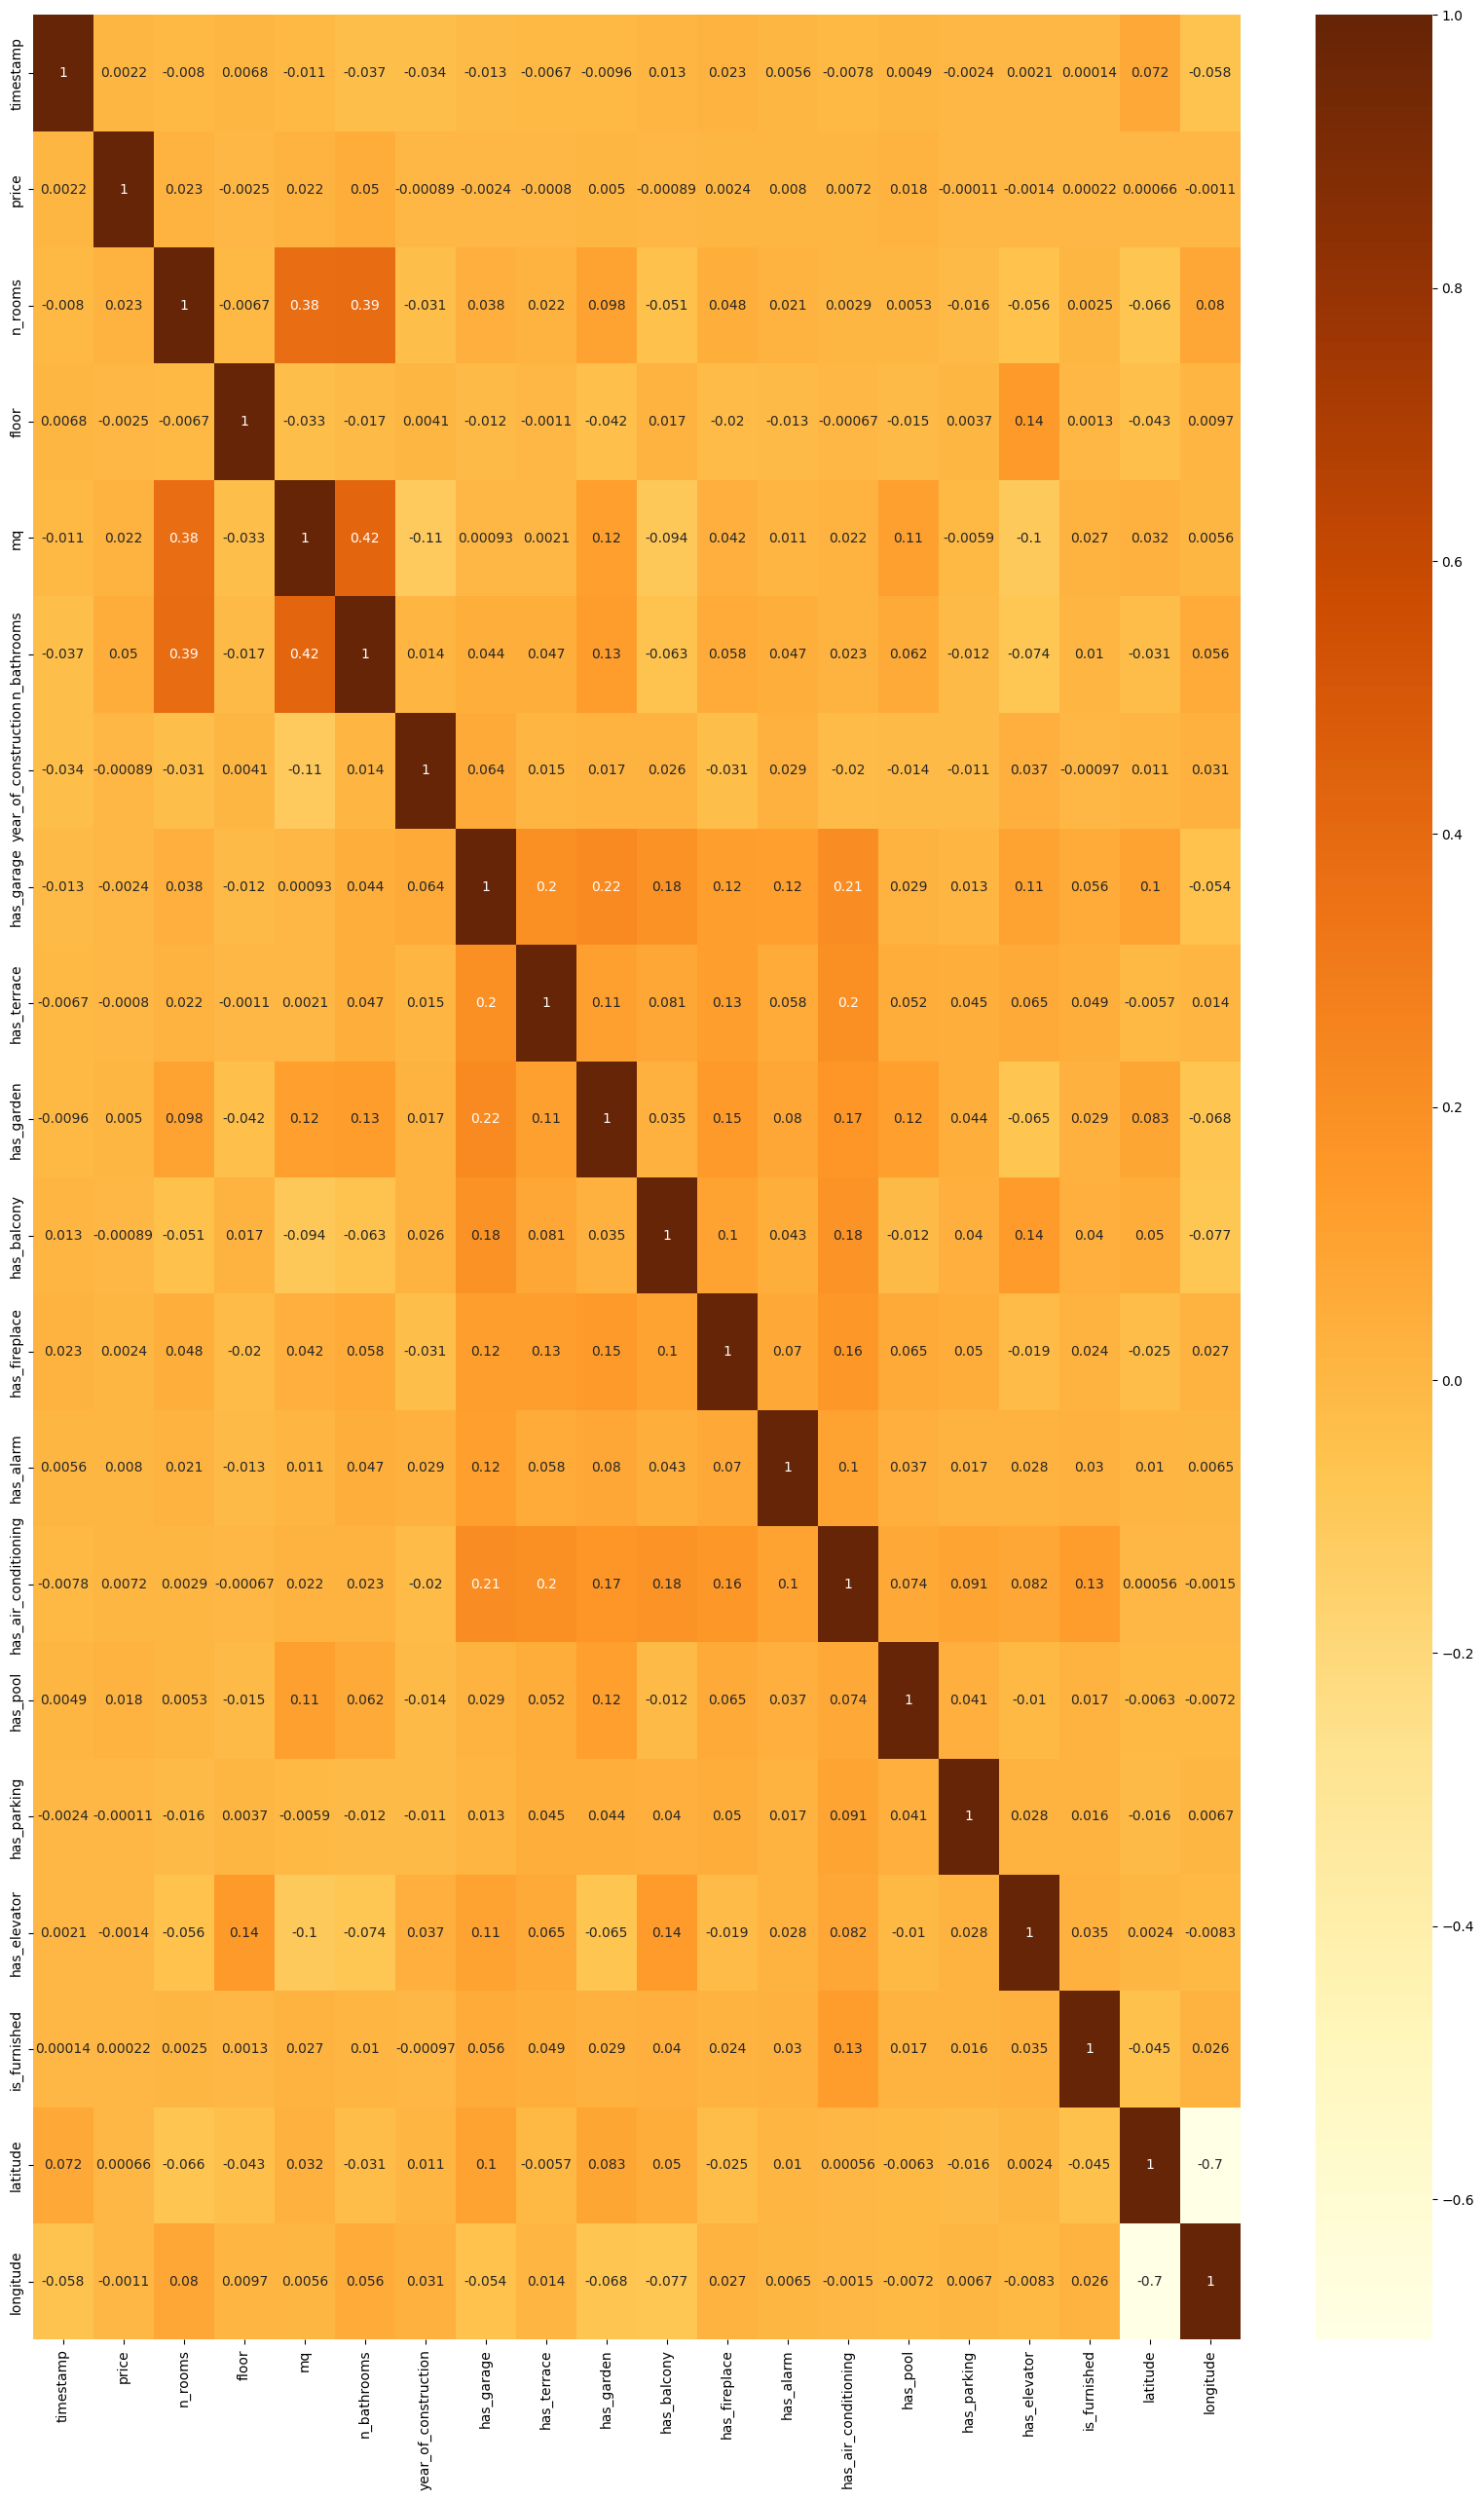

In [28]:
columnas_corr = ['timestamp', 'price', 'n_rooms', 'floor',
                      'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace','has_garden', 'has_balcony',
                      'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'latitude','longitude']
corr_matrix = housdf[columnas_corr].corr()


plt.figure(figsize=(20, 31))
sns.heatmap(corr_matrix,cmap="YlOrBr", annot=True)
plt.show()

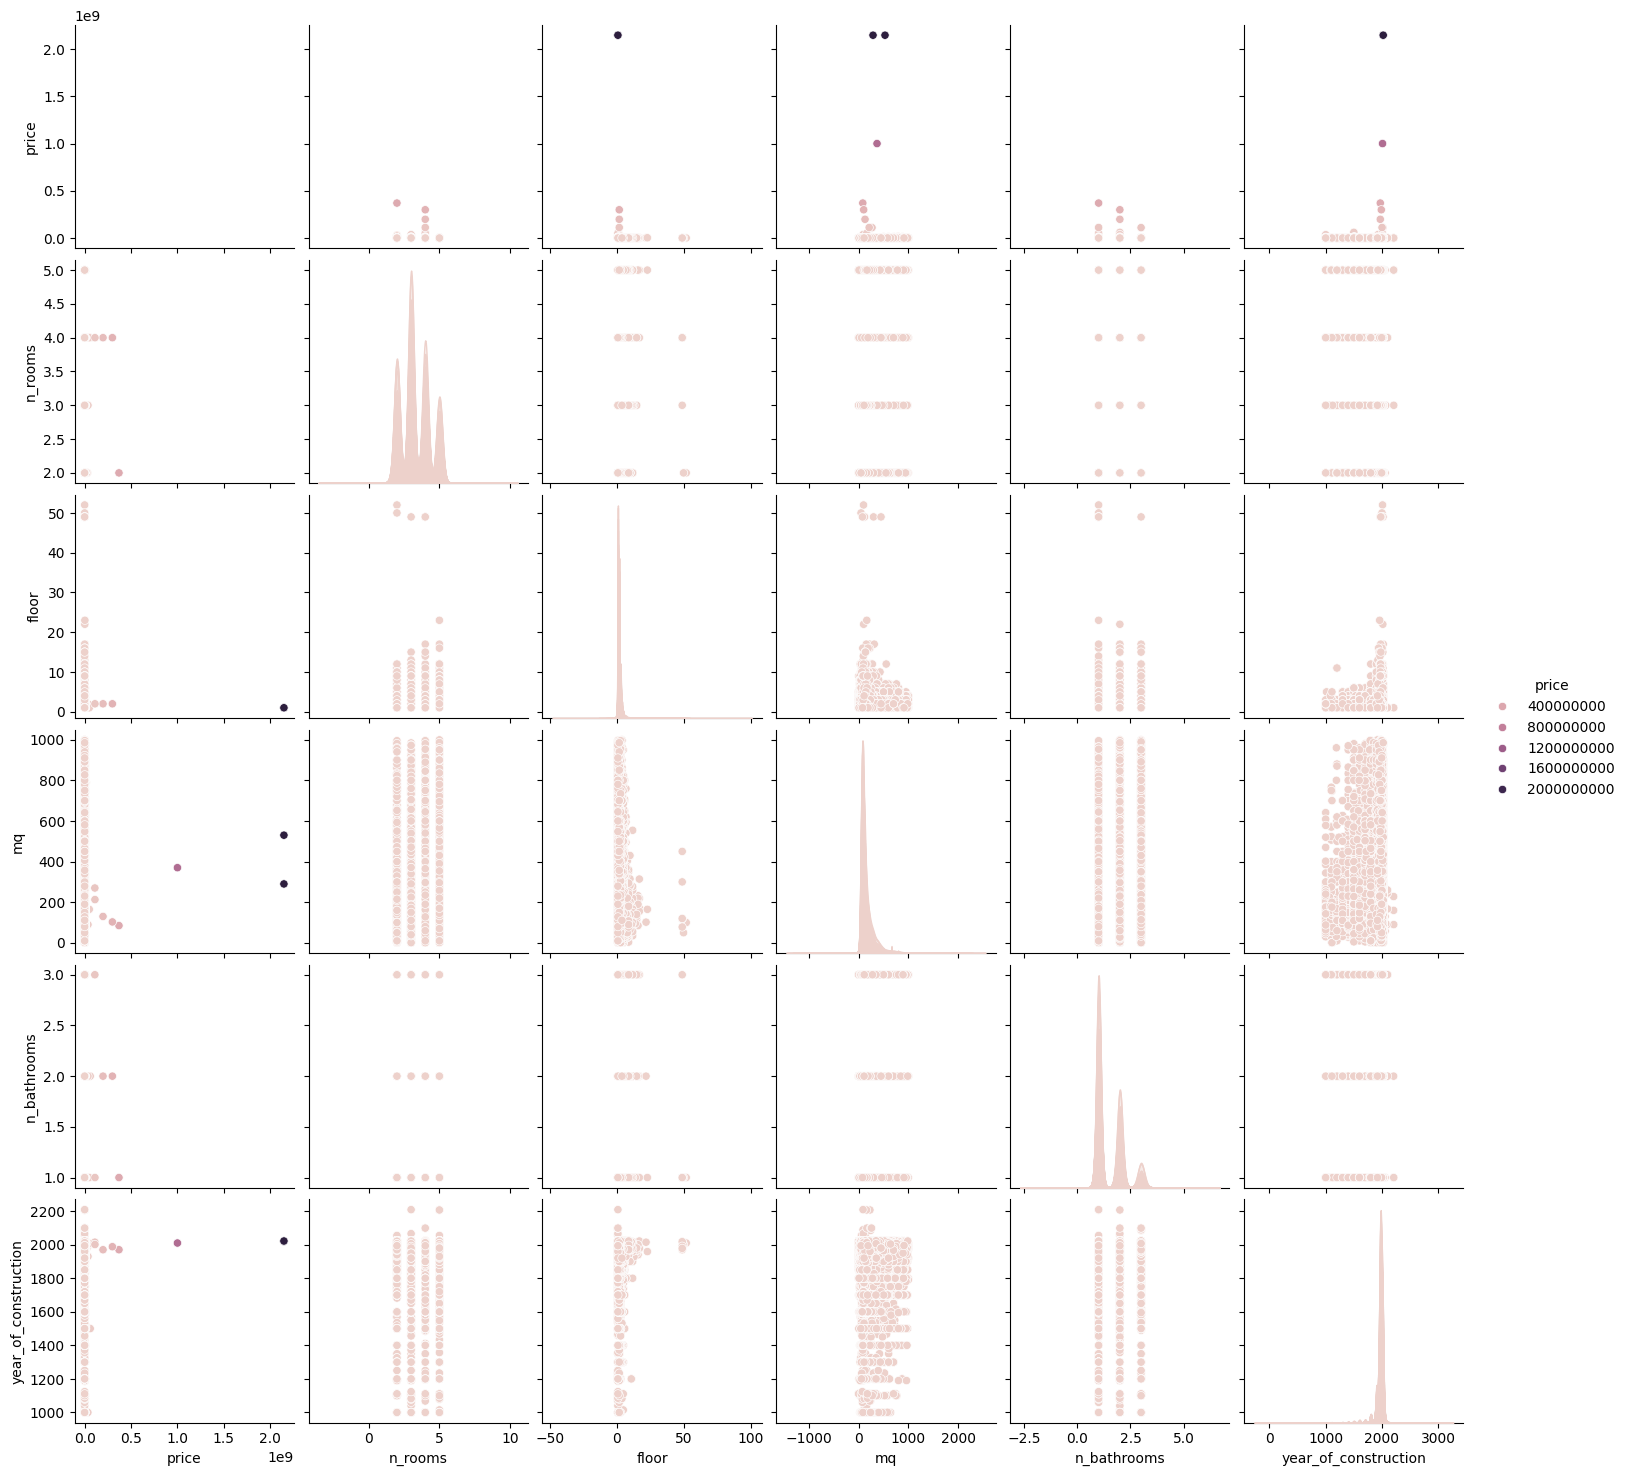

In [6]:
columnas_interes = ['price', 'n_rooms', 'floor',
                      'mq', 'n_bathrooms', 'year_of_construction']

sns.pairplot(housdf, hue='price', vars=columnas_interes)

In [5]:
print(housdf.describe())

          timestamp         price        n_rooms          floor  \
count  2.134090e+05  1.759310e+05  155561.000000  144307.000000   
mean   1.661136e+09  2.413253e+05       3.503442       1.820466   
std    1.266113e+04  7.739356e+06       0.985594       1.134597   
min    1.661114e+09  1.000000e+00       2.000000       1.000000   
25%    1.661125e+09  7.700000e+04       3.000000       1.000000   
50%    1.661136e+09  1.350000e+05       3.000000       2.000000   
75%    1.661146e+09  2.350000e+05       4.000000       2.000000   
max    1.661159e+09  2.147484e+09       5.000000      52.000000   

                  mq    n_bathrooms  year_of_construction     has_garage  \
count  209520.000000  199605.000000         213399.000000  213409.000000   
mean      158.692311       1.587751           1965.096462       0.180292   
std       128.708312       0.668113             76.663750       0.384432   
min         1.000000       1.000000           1000.000000       0.000000   
25%        80.00

<Axes: xlabel='price', ylabel='mq'>

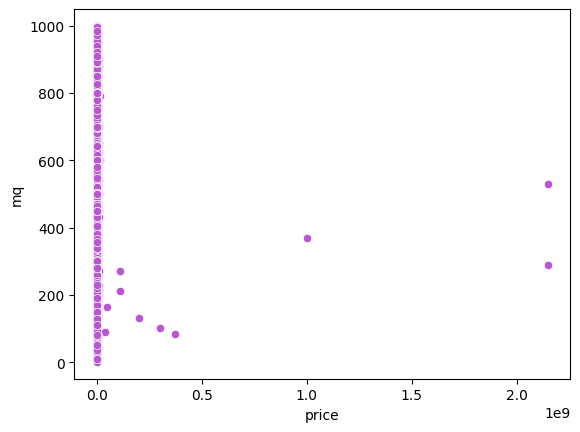

In [6]:
sns.scatterplot(x='price', y='mq',color = 'mediumorchid', data=housdf)

In [17]:
print(housdf['n_bathrooms'].isnull().sum())  
print(housdf['n_bathrooms'].value_counts()) 

0
n_bathrooms
1.0    116458
2.0     76584
3.0     20367
Name: count, dtype: int64


In [18]:
housdf['n_bathrooms'].fillna(1, inplace=True)

/tmp/ipykernel_4023/3658449706.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housdf['n_bathrooms'].fillna(1, inplace=True)


# Limpieza de datos

Primeramente notamos que hay algunos sitios que no tienen información sobre el numero de baños,
en este caso se valora el agregar al menos 1 baño en cada uno de estos casos

In [19]:
print(housdf['n_bathrooms'].isnull().sum())  
print(housdf['n_bathrooms'].value_counts()) 

0
n_bathrooms
1.0    116458
2.0     76584
3.0     20367
Name: count, dtype: int64


In [20]:
print(housdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   mq                    209520 non-null  float64
 6   n_bathrooms           213409 non-null  float64
 7   year_of_construction  213399 non-null  float64
 8   availability          213409 non-null  object 
 9   energy_class          212761 non-null  object 
 10  status                213409 non-null  object 
 11  heating               213409 non-null  object 
 12  has_garage            213409 non-null  int64  
 13  has_terrace           213409 non-null  int64  
 14  has_garden            213409 non-null  int64  
 15  

In [21]:
housdf.drop('floor', axis=1, inplace=True)

KeyError: "['floor'] not found in axis"

In [22]:
print(housdf.columns)

Index(['timestamp', 'location', 'title', 'price', 'n_rooms', 'mq',
       'n_bathrooms', 'year_of_construction', 'availability', 'energy_class',
       'status', 'heating', 'has_garage', 'has_terrace', 'has_garden',
       'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning',
       'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'latitude',
       'longitude'],
      dtype='object')


In [23]:
print(housdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   mq                    209520 non-null  float64
 6   n_bathrooms           213409 non-null  float64
 7   year_of_construction  213399 non-null  float64
 8   availability          213409 non-null  object 
 9   energy_class          212761 non-null  object 
 10  status                213409 non-null  object 
 11  heating               213409 non-null  object 
 12  has_garage            213409 non-null  int64  
 13  has_terrace           213409 non-null  int64  
 14  has_garden            213409 non-null  int64  
 15  

In [24]:
print(housdf['n_rooms'].isnull().sum())  
print(housdf['n_rooms'].value_counts()) 

57848
n_rooms
3.0    54243
4.0    45207
5.0    29740
2.0    26371
Name: count, dtype: int64


### Con la finalidad de agregar valores a el numero de cuartos se calcula un promedio a partir del costo del sitio

In [25]:
bins = [0, 77000, 135000, 235000, np.inf]  
labels = ['0-77k', '77k-135k', '135k-235k', '235k+']


housdf['price_range'] = pd.cut(housdf['price'], bins=bins, labels=labels)
avg_rooms_by_price_range = housdf.groupby('price_range')['n_rooms'].mean()

def assign_rooms_based_on_price(row):
    if pd.isnull(row['n_rooms']) and not pd.isnull(row['price']):
      
        predicted_rooms = avg_rooms_by_price_range[row['price_range']]
        return np.round(predicted_rooms).clip(2, 5) 
    return row['n_rooms']


housdf['n_rooms'] = housdf.apply(assign_rooms_based_on_price, axis=1)
housdf.drop('price_range', axis=1, inplace=True)


print(housdf['n_rooms'].isnull().sum()) 


/tmp/ipykernel_4023/3948579879.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rooms_by_price_range = housdf.groupby('price_range')['n_rooms'].mean()


13700


In [26]:
print(housdf['n_rooms'].isnull().sum())  
print(housdf['n_rooms'].value_counts())

13700
n_rooms
4.0    74961
3.0    68637
5.0    29740
2.0    26371
Name: count, dtype: int64


### Con la finalidad de obtener el precio de más sitios calculamos un promedio a partir del area útil de la construcción

In [27]:
bins = [0, 80, 118, 189, np.inf] 
labels = ['0-80', '80-118', '118-189', '189+']


housdf['mq_range'] = pd.cut(housdf['mq'], bins=bins, labels=labels)
avg_price_by_mq_range = housdf.groupby('mq_range')['price'].mean()


def assign_price_based_on_mq(row):
    if pd.isnull(row['price']) and not pd.isnull(row['mq']):
        return avg_price_by_mq_range[row['mq_range']]
    return row['price']

housdf['price'] = housdf.apply(assign_price_based_on_mq, axis=1)
housdf.drop('mq_range', axis=1, inplace=True)

print(housdf['price'].isnull().sum()) 

/tmp/ipykernel_4023/2958649482.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_mq_range = housdf.groupby('mq_range')['price'].mean()


1350


In [28]:
print(housdf['price'].isnull().sum())  
print(housdf['price'].value_counts())

1350
price
1.593226e+05    9404
1.970781e+05    9194
4.731472e+05    9095
9.793141e+04    8435
8.500000e+04    2978
                ... 
2.980000e+06       1
2.990000e+08       1
1.628100e+04       1
1.362000e+06       1
2.375000e+05       1
Name: count, Length: 2789, dtype: int64


In [29]:
print(housdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 212059 non-null  float64
 4   n_rooms               199709 non-null  float64
 5   mq                    209520 non-null  float64
 6   n_bathrooms           213409 non-null  float64
 7   year_of_construction  213399 non-null  float64
 8   availability          213409 non-null  object 
 9   energy_class          212761 non-null  object 
 10  status                213409 non-null  object 
 11  heating               213409 non-null  object 
 12  has_garage            213409 non-null  int64  
 13  has_terrace           213409 non-null  int64  
 14  has_garden            213409 non-null  int64  
 15  

In [30]:
housdf = housdf[housdf['mq'].notna()]


print(housdf.shape) 


housdf.head()

(209520, 25)


,timestamp,location,title,price,n_rooms,mq,n_bathrooms,year_of_construction,availability,energy_class,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,siculiana,"villa unifamiliare via campo spoto 38, siculiana",46000.0,4.0,85.0,2.0,NaN,not free / other,NaN,...,0,0,0,0,0,0,0,0,37.338086,13.421996
1,1.661114e+09,strongoli,"quadrilocale contrada tronga 211, tronca, stro...",120000.0,4.0,190.0,2.0,NaN,not free / other,a3,...,0,0,0,0,0,0,0,0,39.263959,17.052026
2,1.661114e+09,zelbio,"bilocale buono stato, piano terra, zelbio",55000.0,2.0,85.0,1.0,NaN,not free / other,g,...,0,1,0,1,0,0,0,0,45.904582,9.180539
3,1.661114e+09,villamagna,"casa colonica, da ristrutturare, 319 m², villa...",130000.0,4.0,319.0,1.0,NaN,not free / other,g,...,0,0,0,0,0,0,0,0,42.333295,14.236808
4,1.661114e+09,vallefiorita,"appartamento corso italia, vallefiorita",30000.0,3.0,143.0,2.0,NaN,not free / other,g,...,0,0,0,1,0,0,0,0,38.776385,16.461003


In [31]:
housdf = housdf[housdf['year_of_construction'].notna()]
print(housdf.shape)

housdf.head()
print(housdf.info())

(209510, 25)
<class 'pandas.core.frame.DataFrame'>
Index: 209510 entries, 10 to 213408
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             209510 non-null  float64
 1   location              209510 non-null  object 
 2   title                 209510 non-null  object 
 3   price                 209510 non-null  float64
 4   n_rooms               196706 non-null  float64
 5   mq                    209510 non-null  float64
 6   n_bathrooms           209510 non-null  float64
 7   year_of_construction  209510 non-null  float64
 8   availability          209510 non-null  object 
 9   energy_class          208890 non-null  object 
 10  status                209510 non-null  object 
 11  heating               209510 non-null  object 
 12  has_garage            209510 non-null  int64  
 13  has_terrace           209510 non-null  int64  
 14  has_garden            209510 non-null  int6

In [34]:


bins = [0, 77000, 135000, 235000, np.inf] 
labels = ['0-77k', '77k-135k', '135k-235k', '235k+']


housdf['price_range'] = pd.cut(housdf['price'], bins=bins, labels=labels)

avg_rooms_by_price_range = housdf.groupby('price_range')['n_rooms'].mean()

def assign_rooms_based_on_price(row):
    if pd.isnull(row['n_rooms']) and not pd.isnull(row['price']):
        # Redondear el valor promedio de cuartos
        predicted_rooms = avg_rooms_by_price_range[row['price_range']]
        return np.round(predicted_rooms).clip(2, 5) 
    return row['n_rooms']


housdf['n_rooms'] = housdf.apply(assign_rooms_based_on_price, axis=1)
housdf.drop('price_range', axis=1, inplace=True)

print(housdf['n_rooms'].isnull().sum())

/tmp/ipykernel_4023/4110636025.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rooms_by_price_range = housdf.groupby('price_range')['n_rooms'].mean()


0


In [35]:
housdf = housdf[housdf['energy_class'].notna()]
print(housdf.shape)

housdf.head()
print(housdf.info())

(208890, 25)
<class 'pandas.core.frame.DataFrame'>
Index: 208890 entries, 10 to 213408
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             208890 non-null  float64
 1   location              208890 non-null  object 
 2   title                 208890 non-null  object 
 3   price                 208890 non-null  float64
 4   n_rooms               208890 non-null  float64
 5   mq                    208890 non-null  float64
 6   n_bathrooms           208890 non-null  float64
 7   year_of_construction  208890 non-null  float64
 8   availability          208890 non-null  object 
 9   energy_class          208890 non-null  object 
 10  status                208890 non-null  object 
 11  heating               208890 non-null  object 
 12  has_garage            208890 non-null  int64  
 13  has_terrace           208890 non-null  int64  
 14  has_garden            208890 non-null  int6

# Hecha una limpieza de los datos eliminamos aquellos que no contaban con la ubicación geografica

In [36]:
housdf = housdf[housdf['latitude'].notna()]
print(housdf.shape)

housdf.head()
print(housdf.info())

(208830, 25)
<class 'pandas.core.frame.DataFrame'>
Index: 208830 entries, 10 to 213408
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             208830 non-null  float64
 1   location              208830 non-null  object 
 2   title                 208830 non-null  object 
 3   price                 208830 non-null  float64
 4   n_rooms               208830 non-null  float64
 5   mq                    208830 non-null  float64
 6   n_bathrooms           208830 non-null  float64
 7   year_of_construction  208830 non-null  float64
 8   availability          208830 non-null  object 
 9   energy_class          208830 non-null  object 
 10  status                208830 non-null  object 
 11  heating               208830 non-null  object 
 12  has_garage            208830 non-null  int64  
 13  has_terrace           208830 non-null  int64  
 14  has_garden            208830 non-null  int6

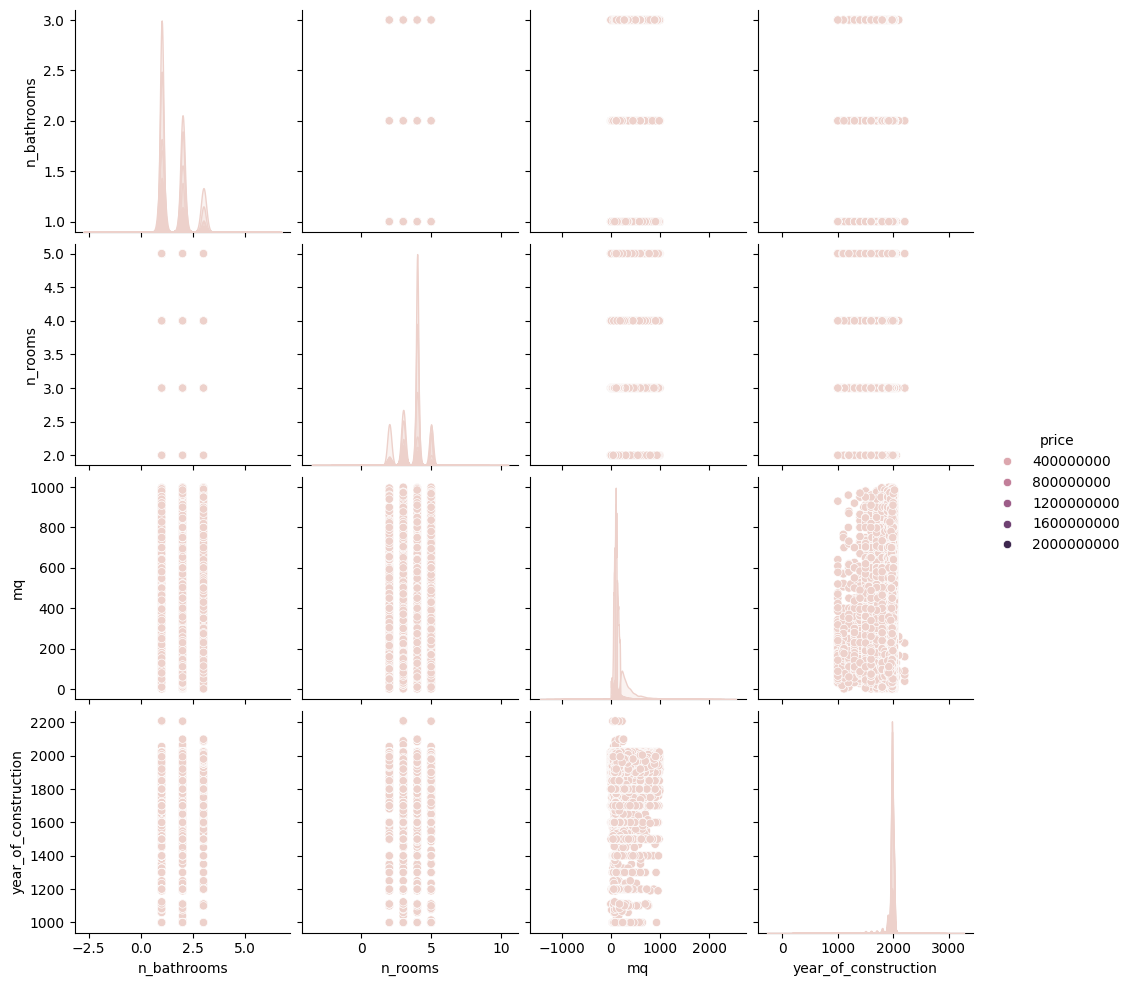

In [71]:
columnas_interes = [ 'n_bathrooms', 'n_rooms', 'mq','year_of_construction']

sns.pairplot(housdf, hue='price', vars=columnas_interes)

In [37]:
housdf.to_csv('housdf_limpio.csv', index=False)


## Cargamos el archivo tratado

In [40]:
clhousing = pd.read_csv('housdf_limpio.csv')

In [41]:
dfhousing = pd.DataFrame(clhousing)
dfhousing.head()

,timestamp,location,title,price,n_rooms,mq,n_bathrooms,year_of_construction,availability,energy_class,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,zumpano,"appartamento via alcide de gasperi 7, zumpano",90000.000000,5.0,124.0,2.0,2002.0,not free / other,e,...,0,0,0,0,0,0,0,1,39.310894,16.292094
1,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",473147.246765,4.0,200.0,3.0,2012.0,not free / other,b,...,0,0,0,0,0,0,0,1,39.310894,16.292094
2,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",197078.124982,4.0,167.0,2.0,2012.0,not free / other,a,...,0,0,0,0,0,0,0,1,39.310894,16.292094
3,1.661114e+09,zumpano,"quadrilocale via san pasquale 19, zumpano",59000.000000,4.0,127.0,1.0,2001.0,not free / other,d,...,0,1,0,1,0,0,1,0,39.310894,16.292094
4,1.661114e+09,zumpano,"villa unifamiliare viale della resistenza, zum...",473147.246765,4.0,205.0,2.0,2018.0,not free / other,a,...,1,0,0,0,0,0,0,0,39.310894,16.292094


In [44]:
dfhousing = dfhousing.drop('availability', axis=1)

In [50]:
print(dfhousing['energy_class'].value_counts())

energy_class
g     109313
f      23971
e      16292
a      15139
d      12382
c       7999
a1      7272
b       6306
a4      4278
a+      2691
a3      1697
a2      1490
Name: count, dtype: int64


### De acuerdo a la información en linea sobre la clase de energia, resulta de importancia a la hora de rentar pues indica la eficiencia en cuanto al gasto siendo D el menos eficiente y que más gasto implica
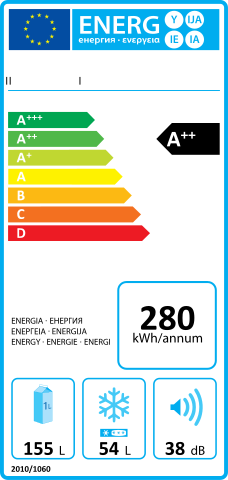

Se modifica el tipo de datos que clasifican la variable energyClass, se mantiene un orden que tenga sentido

In [51]:
energy_class_mapping = {
    'a': 1,
    'a1': 2,
    'a2': 3,
    'a3': 4,
    'a4': 5,
    'a+': 6,
    'g': 7,
    'f': 8,
    'e': 9,
    'd': 10,
    'c': 11,
    'b': 12
    
}


dfhousing['energy_class'] = dfhousing['energy_class'].map(energy_class_mapping)

print(dfhousing.head())

      timestamp location                                              title  \
0  1.661114e+09  zumpano      appartamento via alcide de gasperi 7, zumpano   
1  1.661114e+09  zumpano    villa a schiera viale della resistenza, zumpano   
2  1.661114e+09  zumpano    villa a schiera viale della resistenza, zumpano   
3  1.661114e+09  zumpano        quadrilocale via san pasquale   19, zumpano   
4  1.661114e+09  zumpano  villa unifamiliare viale della resistenza, zum...   

           price  n_rooms     mq  n_bathrooms  year_of_construction  \
0   90000.000000      5.0  124.0          2.0                2002.0   
1  473147.246765      4.0  200.0          3.0                2012.0   
2  197078.124982      4.0  167.0          2.0                2012.0   
3   59000.000000      4.0  127.0          1.0                2001.0   
4  473147.246765      4.0  205.0          2.0                2018.0   

   energy_class status  ... has_balcony  has_fireplace  has_alarm  \
0             9  other  ...  

In [53]:
dfhousing.head()

,timestamp,location,title,price,n_rooms,mq,n_bathrooms,year_of_construction,energy_class,status,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,zumpano,"appartamento via alcide de gasperi 7, zumpano",90000.000000,5.0,124.0,2.0,2002.0,9,other,...,0,0,0,0,0,0,0,1,39.310894,16.292094
1,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",473147.246765,4.0,200.0,3.0,2012.0,12,other,...,0,0,0,0,0,0,0,1,39.310894,16.292094
2,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",197078.124982,4.0,167.0,2.0,2012.0,1,other,...,0,0,0,0,0,0,0,1,39.310894,16.292094
3,1.661114e+09,zumpano,"quadrilocale via san pasquale 19, zumpano",59000.000000,4.0,127.0,1.0,2001.0,10,other,...,0,1,0,1,0,0,1,0,39.310894,16.292094
4,1.661114e+09,zumpano,"villa unifamiliare viale della resistenza, zum...",473147.246765,4.0,205.0,2.0,2018.0,1,other,...,1,0,0,0,0,0,0,0,39.310894,16.292094


In [54]:
print(dfhousing['status'].value_counts())

status
other    208830
Name: count, dtype: int64


In [55]:
dfhousing = dfhousing.drop('status', axis=1)

In [56]:
dfhousing.head()

,timestamp,location,title,price,n_rooms,mq,n_bathrooms,year_of_construction,energy_class,heating,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,zumpano,"appartamento via alcide de gasperi 7, zumpano",90000.000000,5.0,124.0,2.0,2002.0,9,autonomous,...,0,0,0,0,0,0,0,1,39.310894,16.292094
1,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",473147.246765,4.0,200.0,3.0,2012.0,12,autonomous,...,0,0,0,0,0,0,0,1,39.310894,16.292094
2,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",197078.124982,4.0,167.0,2.0,2012.0,1,autonomous,...,0,0,0,0,0,0,0,1,39.310894,16.292094
3,1.661114e+09,zumpano,"quadrilocale via san pasquale 19, zumpano",59000.000000,4.0,127.0,1.0,2001.0,10,autonomous,...,0,1,0,1,0,0,1,0,39.310894,16.292094
4,1.661114e+09,zumpano,"villa unifamiliare viale della resistenza, zum...",473147.246765,4.0,205.0,2.0,2018.0,1,autonomous,...,1,0,0,0,0,0,0,0,39.310894,16.292094


In [57]:
print(dfhousing['heating'].value_counts())

heating
autonomous    187141
other          21689
Name: count, dtype: int64


In [58]:
dfhousing['heating'] = dfhousing['heating'].replace({'autonomous': 1, 'other': 0})

/tmp/ipykernel_4023/790058783.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfhousing['heating'] = dfhousing['heating'].replace({'autonomous': 1, 'other': 0})


In [59]:
print(dfhousing['heating'].value_counts())

heating
1    187141
0     21689
Name: count, dtype: int64


In [64]:
print(dfhousing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208830 entries, 0 to 208829
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             208830 non-null  float64
 1   location              208830 non-null  object 
 2   title                 208830 non-null  object 
 3   price                 208830 non-null  float64
 4   n_rooms               208830 non-null  float64
 5   mq                    208830 non-null  float64
 6   n_bathrooms           208830 non-null  float64
 7   year_of_construction  208830 non-null  float64
 8   energy_class          208830 non-null  int64  
 9   heating               208830 non-null  int64  
 10  has_garage            208830 non-null  int64  
 11  has_terrace           208830 non-null  int64  
 12  has_garden            208830 non-null  int64  
 13  has_balcony           208830 non-null  int64  
 14  has_fireplace         208830 non-null  int64  
 15  

In [65]:
dfhousing.to_csv('housdf_limpio.csv', index=False)

### Con esto hemos manejado las últimas variables categoricas de interes

# Reducción de dimensionalidad

In [66]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP

In [68]:
X = dfhousing[['price', 'n_rooms',
                      'mq', 'n_bathrooms', 'year_of_construction','energy_class','heating', 'has_garage', 'has_terrace','has_garden', 'has_balcony',
                      'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'latitude','longitude']]

y = dfhousing['price']


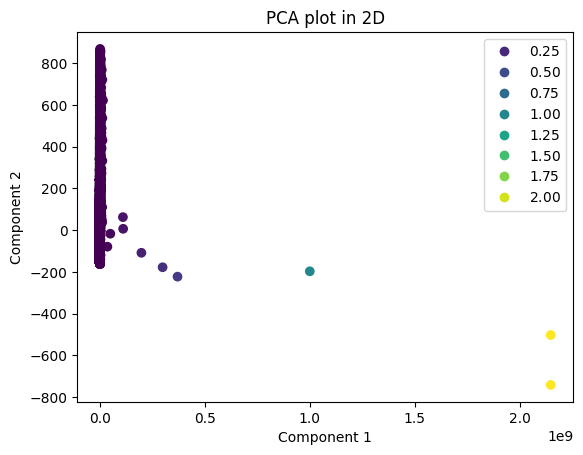

In [76]:
X_PCA = PCA(n_components=2).fit_transform(X)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

# T-Sne


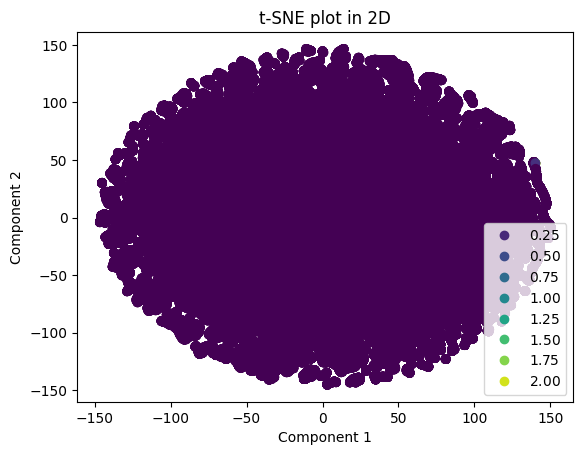

In [78]:
X_TSNE = TSNE(n_components=2).fit_transform(X)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

/home/andylmao/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


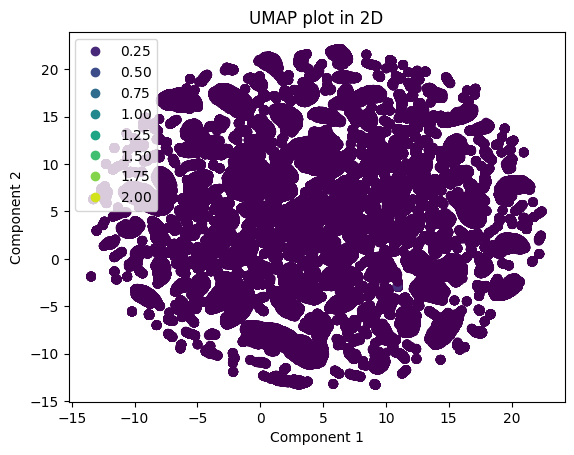

In [79]:
X_UMAP = UMAP(n_components=2).fit_transform(X)

scatter = plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y)
plt.title('UMAP plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

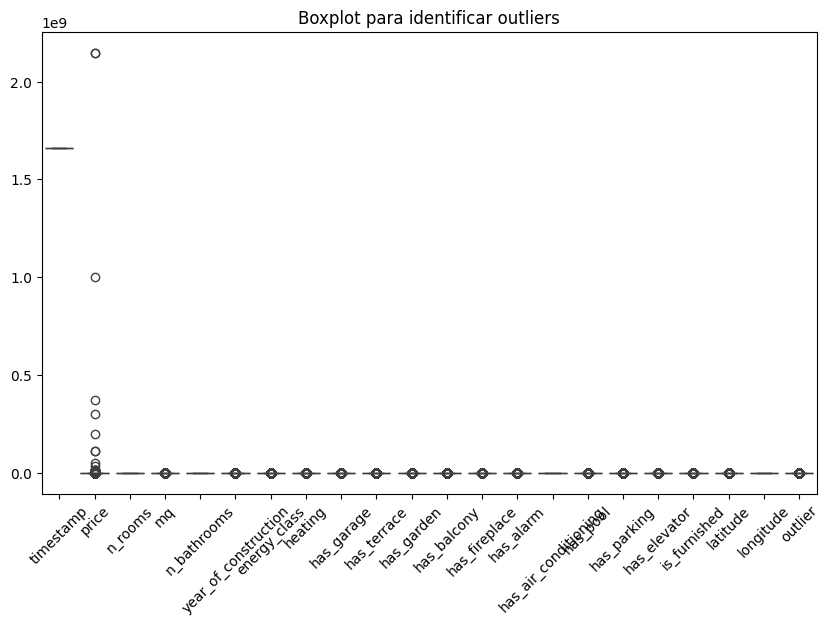

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfhousing)
plt.xticks(rotation=45)
plt.title("Boxplot para identificar outliers")
plt.show()


## Agregamos el atributo antiguedad de la construccion. 
Dendo un sentido de antiguedad real ante una posible compra

In [88]:
from datetime import datetime


dfhousing['property_age'] = datetime.now().year - dfhousing['year_of_construction']
dfhousing.to_csv('updated_housing_data.csv', index=False)

In [89]:
print(dfhousing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208830 entries, 0 to 208829
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             208830 non-null  float64
 1   location              208830 non-null  object 
 2   title                 208830 non-null  object 
 3   price                 208830 non-null  float64
 4   n_rooms               208830 non-null  float64
 5   mq                    208830 non-null  float64
 6   n_bathrooms           208830 non-null  float64
 7   year_of_construction  208830 non-null  float64
 8   energy_class          208830 non-null  int64  
 9   heating               208830 non-null  int64  
 10  has_garage            208830 non-null  int64  
 11  has_terrace           208830 non-null  int64  
 12  has_garden            208830 non-null  int64  
 13  has_balcony           208830 non-null  int64  
 14  has_fireplace         208830 non-null  int64  
 15  

In [3]:
clhousing = pd.read_csv('updated_housing_data.csv')

In [4]:
dfhousing = pd.DataFrame(clhousing)
dfhousing.head()

,timestamp,location,title,price,n_rooms,mq,n_bathrooms,year_of_construction,energy_class,heating,...,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude,outlier,property_age
0,1.661114e+09,zumpano,"appartamento via alcide de gasperi 7, zumpano",90000.000000,5.0,124.0,2.0,2002.0,9,1,...,0,0,0,0,0,1,39.310894,16.292094,1,22.0
1,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",473147.246765,4.0,200.0,3.0,2012.0,12,1,...,0,0,0,0,0,1,39.310894,16.292094,1,12.0
2,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",197078.124982,4.0,167.0,2.0,2012.0,1,1,...,0,0,0,0,0,1,39.310894,16.292094,1,12.0
3,1.661114e+09,zumpano,"quadrilocale via san pasquale 19, zumpano",59000.000000,4.0,127.0,1.0,2001.0,10,1,...,0,1,0,0,1,0,39.310894,16.292094,1,23.0
4,1.661114e+09,zumpano,"villa unifamiliare viale della resistenza, zum...",473147.246765,4.0,205.0,2.0,2018.0,1,1,...,0,0,0,0,0,0,39.310894,16.292094,1,6.0


In [5]:
dfhousing = dfhousing.drop('outlier', axis=1)

In [6]:
dfhousing.head()

,timestamp,location,title,price,n_rooms,mq,n_bathrooms,year_of_construction,energy_class,heating,...,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude,property_age
0,1.661114e+09,zumpano,"appartamento via alcide de gasperi 7, zumpano",90000.000000,5.0,124.0,2.0,2002.0,9,1,...,0,0,0,0,0,0,1,39.310894,16.292094,22.0
1,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",473147.246765,4.0,200.0,3.0,2012.0,12,1,...,0,0,0,0,0,0,1,39.310894,16.292094,12.0
2,1.661114e+09,zumpano,"villa a schiera viale della resistenza, zumpano",197078.124982,4.0,167.0,2.0,2012.0,1,1,...,0,0,0,0,0,0,1,39.310894,16.292094,12.0
3,1.661114e+09,zumpano,"quadrilocale via san pasquale 19, zumpano",59000.000000,4.0,127.0,1.0,2001.0,10,1,...,1,0,1,0,0,1,0,39.310894,16.292094,23.0
4,1.661114e+09,zumpano,"villa unifamiliare viale della resistenza, zum...",473147.246765,4.0,205.0,2.0,2018.0,1,1,...,0,0,0,0,0,0,0,39.310894,16.292094,6.0


# Selección de caracteristica

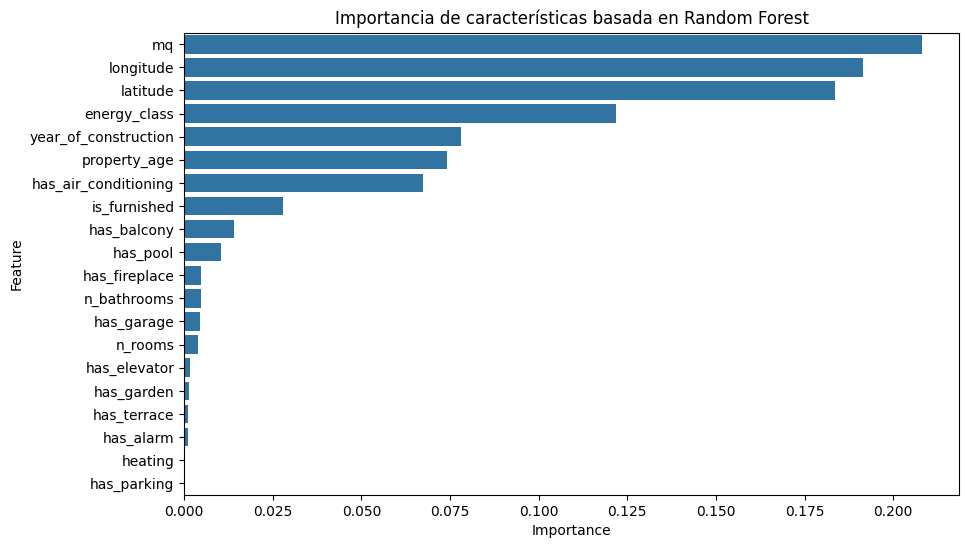

In [15]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = dfhousing.drop(columns=['price', 'timestamp', 'location', 'title'])
y = dfhousing['price']


model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
features = X.columns


feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de características basada en Random Forest')
plt.show()

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression


selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)


selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['n_rooms', 'mq', 'n_bathrooms', 'heating', 'has_garage', 'has_garden',
       'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool'],
      dtype='object')


In [18]:
selected_features = feature_importances['Feature'].head(10).values
print(f"Características seleccionadas: {selected_features}")


X_new = dfhousing[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R²: {r2}")

Características seleccionadas: ['mq' 'longitude' 'latitude' 'energy_class' 'year_of_construction'
 'property_age' 'has_air_conditioning' 'is_furnished' 'has_balcony'
 'has_pool']
MSE: 136788693338895.58
R²: 0.0005903595332489298


In [21]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(dfhousing['price']))
housdf_no_outliers = dfhousing[(z_scores < 3)]

In [ ]:

X = dfhousing.drop(columns=['price', 'timestamp', 'location', 'title'])
y = dfhousing['price']


model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
features = X.columns


feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de características basada en Random Forest')
plt.show()

In [ ]:
selected_features = feature_importances['Feature'].head(10).values
print(f"Características seleccionadas: {selected_features}")


X_new = dfhousing[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R²: {r2}")